In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette("Dark2")

In [2]:
import os

os.chdir(r"D:\ExpInfect_LinIV_PPRV\results\models3")

In [3]:
# importing data

df_baseline = pd.read_csv("baseline_cases.csv")
df_stratified1 = pd.read_csv("stratified1_cases.csv")
df_stratified3 = pd.read_csv("stratified3_cases.csv")
df_stratified4 = pd.read_csv("stratified4_cases.csv")

# # corrected stratified 3 
# df_stratified3_corrected = pd.read_csv("stratified3_cases_new_exp_5_48h.csv")

In [4]:
from scipy import stats

def combine_columns(df, col1, col2, new_col):
    combined_column = df[col1].astype(str) + "_" + df[col2].astype(str)
    df.insert(0, new_col, combined_column)
    df.drop([col1, col2], axis=1, inplace=True)
    return df

def calculate_sd(df, col1, col2, new_col):
    df.loc[:, new_col] = np.sqrt(df[col1] * (df[col2] - df[col1]))
    return df

def calculate_mean(df, col_pattern, new_col):
    col_list = [col for col in df.columns if col_pattern in col]
    df[new_col] = df[col_list].mean(axis=1)
    return df, col_list

def calculate_quantiles(df, data, quantiles, labels):
    quantile_values = np.quantile(data, q=quantiles, axis=1).astype(float)
    for i, label in enumerate(labels):
        df[label] = quantile_values[i]
    return df

def calculate_mode(df, col_pattern, new_col):
    col_list = [col for col in df.columns if col_pattern in col]
    mode_values, _ = stats.mode(df[col_list], axis=1, nan_policy='omit')
    df[new_col] = mode_values.flatten()
    return df, col_list

In [5]:
# Use the functions to process your data

df_baseline = combine_columns(df_baseline, 'experiment', 'duration', 'Exp')
df_stratified3 = combine_columns(df_stratified3, 'experiment', 'duration', 'Exp')
df_stratified4 = combine_columns(df_stratified4, 'experiment', 'duration', 'Exp')
df_stratified1 = combine_columns(df_stratified1, 'experiment', 'duration', 'Exp')

# df_stratified3_corrected = combine_columns(df_stratified3_corrected, 'experiment', 'duration', 'Exp')

datacal = df_baseline[["Exp", "N", "obs"]]  

In [6]:
datacal = calculate_sd(datacal, 'obs', 'N', 'sd')

C:\Users\manal\AppData\Local\Temp\ipykernel_17132\2970588888.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, new_col] = np.sqrt(df[col1] * (df[col2] - df[col1]))


In [ ]:
df_baseline, y_pred_columns_baseline = calculate_mean(df_baseline, 'cases', 'Mean')
y_pred_data_baseline = df_baseline[y_pred_columns_baseline].values

df_stratified3, y_pred_columns_stratified3 = calculate_mean(df_stratified3, 'cases', 'Mean')
y_pred_data_stratified3 = df_stratified3[y_pred_columns_stratified3].values

df_stratified4, y_pred_columns_stratified4 = calculate_mean(df_stratified4, 'cases', 'Mean')
y_pred_data_stratified4 = df_stratified4[y_pred_columns_stratified4].values

df_stratified1, y_pred_columns_stratified1 = calculate_mean(df_stratified1, 'cases', 'Mean')
y_pred_data_stratified1 = df_stratified1[y_pred_columns_stratified1].values


# df_stratified3_corrected, y_pred_columns_stratified3_corrected = calculate_mean(df_stratified3_corrected, 'cases', 'Mean')
# y_pred_data_stratified3_corrected = df_stratified3_corrected[y_pred_columns_stratified3_corrected].values

In [7]:
df_baseline, y_pred_columns_baseline = calculate_mode(df_baseline, 'cases', 'Mode')
y_pred_data_baseline = df_baseline[y_pred_columns_baseline].values

df_stratified3, y_pred_columns_stratified3 = calculate_mode(df_stratified3, 'cases', 'Mode')
y_pred_data_stratified3 = df_stratified3[y_pred_columns_stratified3].values

df_stratified4, y_pred_columns_stratified4 = calculate_mode(df_stratified4, 'cases', 'Mode')
y_pred_data_stratified4 = df_stratified4[y_pred_columns_stratified4].values

df_stratified1, y_pred_columns_stratified1 = calculate_mode(df_stratified1, 'cases', 'Mode')
y_pred_data_stratified1 = df_stratified1[y_pred_columns_stratified1].values


In [8]:
quantiles = [0.025, 0.25, 0.5, 0.75, 0.975]
quantile_labels = ['CI_2.5', 'CI_25', 'Median', 'CI_75', 'CI_97.5']

df_baseline = calculate_quantiles(df_baseline, y_pred_data_baseline, quantiles, quantile_labels)
df_baseline.drop(y_pred_columns_baseline, axis=1, inplace=True)

df_stratified3 = calculate_quantiles(df_stratified3, y_pred_data_stratified3, quantiles, quantile_labels)
df_stratified3.drop(y_pred_columns_stratified3, axis=1, inplace=True)

# df_stratified3_corrected = calculate_quantiles(df_stratified3_corrected, y_pred_data_stratified3_corrected, quantiles, quantile_labels)
# df_stratified3_corrected.drop(y_pred_columns_stratified3_corrected, axis=1, inplace=True)

df_stratified4 = calculate_quantiles(df_stratified4, y_pred_data_stratified4, quantiles, quantile_labels)
df_stratified4.drop(y_pred_columns_stratified4, axis=1, inplace=True)

df_stratified1 = calculate_quantiles(df_stratified1, y_pred_data_stratified1, quantiles, quantile_labels)
df_stratified1.drop(y_pred_columns_stratified1, axis=1, inplace=True)

In [ ]:
# # Plotting the main line and points
# plt.figure(figsize=(10, 8))


# # plotting results of baseline model in red
# sns.lineplot(data=df_baseline, x='Exp', y='Mean', color='r', marker= 'o', label='Baseline')
# plt.fill_between(df_baseline['Exp'], df_baseline['CI_2.5'], df_baseline['CI_97.5'], color='r', alpha=0.2)
# plt.fill_between(df_baseline['Exp'], df_baseline['CI_25'], df_baseline['CI_75'], color='r', alpha=0.4)

# # plotting results of corrected stratified3 model in green
# sns.lineplot(data=df_stratified3_corrected, x='Exp', y='Mean', color='teal', marker= 'o', label='Stratified3 Corrected')
# plt.fill_between(df_stratified3_corrected['Exp'], df_stratified3_corrected['CI_2.5'], df_stratified3_corrected['CI_97.5'], color='green', alpha=0.2)
# plt.fill_between(df_stratified3_corrected['Exp'], df_stratified3_corrected['CI_25'], df_stratified3_corrected['CI_75'], color='green', alpha=0.4)


# # Adding points and error bars from real observations
# sns.scatterplot(data=datacal, x='Exp', y='obs', color='blue', label='Observed')
# plt.errorbar(datacal['Exp'], datacal['obs'], yerr=datacal['sd'], fmt='none', ecolor='black')


# # Setting labels and title
# plt.xlabel("Experiment")
# plt.ylabel("New Infections")

# # Setting y-limits and y-ticks
# plt.ylim(0, 10)
# plt.yticks(np.arange(0, 11, 1))

# # Rotating x-axis labels
# plt.xticks(rotation=90)

# # Hiding the legend
# plt.legend()

# plt.show()

In [15]:
def plot_data_frames(df_list, label_list, save_path=None):

    width_mm = 190
    width_inch = width_mm / 25.4

    # Set height proportionally (assuming aspect ratio, adjust as needed)
    height_inch = 4  # Example height

    plt.figure(figsize=(width_inch, height_inch))
    

    
    for i in range(len(df_list)):
        df = df_list[i]
        label = label_list[i]
        color = colors[i]  # Get color based on index
        
        sns.lineplot(data=df, x='Exp', y='Mode', marker='o', label=label, color=color, alpha=1)
        
    sns.scatterplot(data=datacal, x='Exp', y='obs', color='blue', label='Observed')
    plt.errorbar(datacal['Exp'], datacal['obs'], yerr=datacal['sd'], fmt='none', ecolor='black')
    
    # Set the font size to 7 points
    plt.rcParams.update({'font.size': 7})
    plt.xlabel("Experiments")
    plt.ylabel("New Infections")
    plt.ylim(0, 10)
    plt.yticks(np.arange(0, 11, 1))
    plt.xticks(rotation=90)
    plt.legend()

    if save_path:
        plt.savefig(save_path, format='tiff', dpi=350, bbox_inches='tight') 
    plt.show()

In [16]:
df_list = [df_baseline, df_stratified1, df_stratified3, df_stratified4]
label_list = ["Baseline", "Stratified1" , "Stratified3", "Stratified4", ]

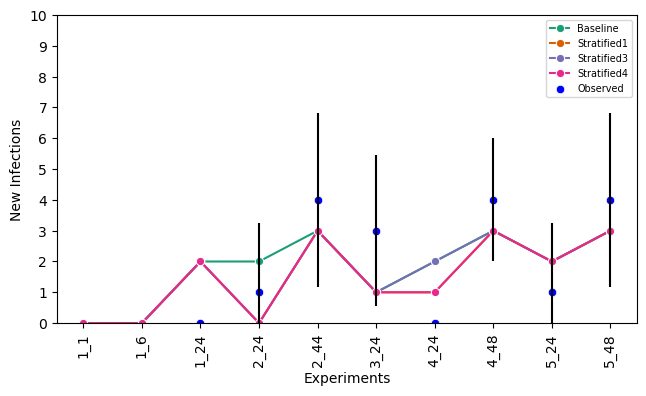

In [17]:
plot_data_frames(df_list, label_list, save_path='models_fit.tiff')

RMSE (Root Mean Squared Error) is a measure of the differences between predicted values and observed values in a regression analysis.
It is calculated by taking the square root of the average of the squared differences between the predicted and observed values.
A **lower** RMSE value indicates a better fit of the model to the data.


In this case, the models were evaluated based on their RMSE values, and the models with lower RMSE values are ranked higher.
The summary table provides the RMSE values for each model, ranked from lowest to highest.

In [19]:
# Calculate RMSE for each model
models = [df_baseline, df_stratified3, df_stratified4, df_stratified1]  # Add more models if needed
rmse_values = []

for model in models:
    predicted_values = model['Mode']
    observed_values = datacal['obs']
    rmse = np.sqrt(np.mean((predicted_values - observed_values) ** 2))
    rmse_values.append(rmse)

# Create a DataFrame with the model names and RMSE values
summary_df = pd.DataFrame({'Model': ['baseline', 'Stratified3', 'Stratified4', 'Stratified1'],
                           'RMSE': rmse_values})

# Add a 'Rank' column based on the RMSE values
summary_df['Rank'] = summary_df['RMSE'].rank()

# Sort the DataFrame by rank
summary_df = summary_df.sort_values('Rank')

# Print the summary table
summary_df


,Model,RMSE,Rank
2,Stratified4,1.183216,1.5
3,Stratified1,1.183216,1.5
0,baseline,1.303840,3.5
1,Stratified3,1.303840,3.5
